In [4]:
!pip install gensim
!pip install nltk

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   -- ------------------------------------- 1.3/24.0 MB 6.7 MB/s eta 0:00:04
   --- ------------------------------------ 2.4/24.0 MB 5.8 MB/s eta 0:00:04
   ---- ----------------------------------- 2.6/24.0 MB 5.8 MB/s eta 0:00:04
   ---- ----------------------------------- 2.9/24.0 MB 3.6 MB/s eta 0:00:06
   ---- ----------------------------------- 2.9/24.0 MB 3.6 MB/s eta 0:00:06
   ------ --------------------------------- 3.7/24.0 MB 2.9 MB/s eta 0:00:07
   ------- -------------------------------- 4.5/24.0 MB 3.2 MB/s eta 0:00:07
   --------- ------------------------------ 5.5/24.0 MB 3.3 MB/s eta 0:00:06
   ---------- ----------------------------- 6.0/24.0 MB 3.3 MB/s eta 0:00:06
   ----------- ---------------------------- 7.1/24.0 MB 3.3 MB/s eta 0:00:06
   ------------- -------------------------- 7.9/24.0 MB 3.4 MB/s eta 0:00:05
   -------------- ------------------------- 8.7/24.0 MB 3.5 MB/s eta 0:00:05
   ---

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# Step 1: Import Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from sklearn.datasets import fetch_20newsgroups
import nltk

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download
from pprint import pprint




# Step 2: Specify custom NLTK data directory and set environment variable
# nltk_data_path = '/kaggle/working/nltk_data'
# os.makedirs(nltk_data_path, exist_ok=True)
# os.environ['NLTK_DATA'] = nltk_data_path

# Download NLTK resources required for processing
# download('punkt', download_dir=nltk_data_path)
# download('stopwords', download_dir=nltk_data_path)
# download('wordnet', download_dir=nltk_data_path)

# Step 3: Fetch and Preprocess Texts
# Fetch the 20 Newsgroups dataset

newsgroups_data = fetch_20newsgroups(subset='all')
texts = newsgroups_data.data

# Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

processed_texts = [preprocess(text) for text in texts]

# Step 4: Create Dictionary and Corpus
dictionary = Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Step 5: Define Topics for Coherence Evaluation
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=20, random_state=42, passes=10)

# Step 6: Evaluate Topics using Coherence Model
coherence_model = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_npmi')
topic_coherence = coherence_model.get_coherence_per_topic()




[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mishr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mishr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mishr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mishr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
topic_coherence

[0.0480971205173823,
 0.04012050784757573,
 0.03261261387315945,
 0.13790576551708236,
 0.0943482878751994,
 -0.1182003928041486,
 0.36627916172093333,
 0.05737438716260038,
 0.1288962337585196,
 0.1103978593262378,
 0.01369653091747866,
 0.0315071781734533,
 -0.010498967928044061,
 0.012924508666769908,
 0.006462075418464862,
 0.12154615196780502,
 -0.03201252914178413,
 0.07468784816064314,
 0.06964786510946885,
 0.06063313602816475]

In [22]:
# Print the top words for each topic
for i, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {i}: {topic}")


Topic 0: 0.016*"medical" + 0.014*"disease" + 0.014*"drug" + 0.013*"patient" + 0.013*"bank" + 0.012*"doctor" + 0.010*"gordon" + 0.009*"treatment" + 0.009*"health" + 0.008*"medicine"
Topic 1: 0.030*"line" + 0.029*"subject" + 0.028*"organization" + 0.017*"university" + 0.011*"thanks" + 0.010*"please" + 0.009*"distribution" + 0.009*"sale" + 0.008*"would" + 0.008*"anyone"
Topic 2: 0.023*"university" + 0.016*"western" + 0.015*"georgia" + 0.013*"reserve" + 0.012*"michael" + 0.012*"cleveland" + 0.011*"organization" + 0.010*"subject" + 0.010*"denver" + 0.010*"line"
Topic 3: 0.026*"space" + 0.010*"earth" + 0.009*"nasa" + 0.008*"henry" + 0.008*"moon" + 0.008*"mission" + 0.008*"orbit" + 0.007*"launch" + 0.006*"satellite" + 0.006*"planet"
Topic 4: 0.027*"image" + 0.021*"file" + 0.012*"available" + 0.011*"data" + 0.011*"program" + 0.010*"software" + 0.009*"ftp" + 0.009*"graphic" + 0.009*"format" + 0.008*"list"
Topic 5: 0.021*"insurance" + 0.017*"canada" + 0.016*"gary" + 0.014*"european" + 0.011*"ra"

C:\Users\mishr\AppData\Local\Temp\ipykernel_14276\2182819662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(topic_coherence)), y=topic_coherence, palette="Blues_d")


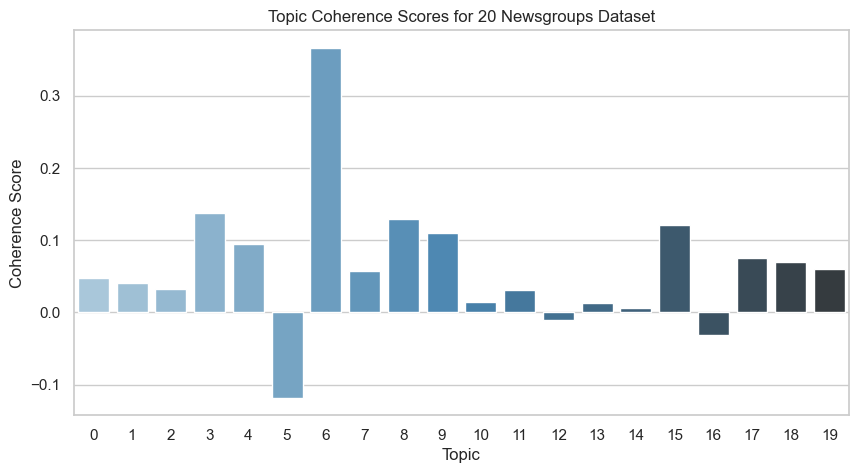

In [23]:

# Step 7: Visualize the Coherence Scores
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(len(topic_coherence)), y=topic_coherence, palette="Blues_d")
plt.xlabel("Topic")
plt.ylabel("Coherence Score")
plt.title("Topic Coherence Scores for 20 Newsgroups Dataset")
plt.show()

In [24]:
# Step 8: Display Topics and Coherence Scores
topics = lda_model.print_topics(num_words=5)
print("Topics and Coherence Scores:")
for i, topic in enumerate(topics):
    print(f"Topic {i}: {topic[1]} | Coherence Score: {topic_coherence[i]}")


Topics and Coherence Scores:
Topic 0: 0.016*"medical" + 0.014*"disease" + 0.014*"drug" + 0.013*"patient" + 0.013*"bank" | Coherence Score: 0.0480971205173823
Topic 1: 0.030*"line" + 0.029*"subject" + 0.028*"organization" + 0.017*"university" + 0.011*"thanks" | Coherence Score: 0.04012050784757573
Topic 2: 0.023*"university" + 0.016*"western" + 0.015*"georgia" + 0.013*"reserve" + 0.012*"michael" | Coherence Score: 0.03261261387315945
Topic 3: 0.026*"space" + 0.010*"earth" + 0.009*"nasa" + 0.008*"henry" + 0.008*"moon" | Coherence Score: 0.13790576551708236
Topic 4: 0.027*"image" + 0.021*"file" + 0.012*"available" + 0.011*"data" + 0.011*"program" | Coherence Score: 0.0943482878751994
Topic 5: 0.021*"insurance" + 0.017*"canada" + 0.016*"gary" + 0.014*"european" + 0.011*"ra" | Coherence Score: -0.1182003928041486
Topic 6: 0.058*"p" + 0.053*"r" + 0.048*"g" + 0.046*"max" + 0.045*"q" | Coherence Score: 0.36627916172093333
Topic 7: 0.020*"key" + 0.010*"chip" + 0.009*"use" + 0.008*"system" + 0.0

In [ ]:
# Save the LDA model
lda_model.save("lda_model.model")

# Save the dictionary
dictionary.save("dictionary.dict")



In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary

# Load the saved LDA model
lda_model = LdaModel.load("lda_model.model")

# Load the dictionary
dictionary = Dictionary.load("dictionary.dict")





In [36]:
# Define a new text to test
new_text = "The ethics of releasing new medicine hinge on patient safety, efficacy, and informed consent. Medicines should be rigorously tested through clinical trials to minimize risks and ensure they truly benefit patients. Accelerating approvals, especially in emergencies, raises concerns about safety versus urgent need. Transparency with the public is crucial, as is ongoing monitoring for side effects post-release. Pharmaceutical companies must prioritize public health over profit, avoiding exploitation or harmful marketing tactics. Ethical medicine release requires balancing innovation with caution, respecting patient rights, and ensuring equitable access to new treatments worldwide, especially for vulnerable populations."
# Preprocess the new text
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

new_processed_text = preprocess(new_text)

# Convert the new text to bag-of-words format
new_bow = dictionary.doc2bow(new_processed_text)

# Get the topic distribution for the new text
topic_distribution = lda_model.get_document_topics(new_bow)

# Display the topic distribution
print("Topic distribution for the new text:")
for topic_id, prob in topic_distribution:
    print(f"Topic {topic_id}: Probability {prob}")


Topic distribution for the new text:
Topic 0: Probability 0.1712334305047989
Topic 1: Probability 0.01925443299114704
Topic 7: Probability 0.36453524231910706
Topic 10: Probability 0.1465645581483841
Topic 11: Probability 0.0206940695643425
Topic 14: Probability 0.04681925103068352
Topic 16: Probability 0.2205362617969513


In [37]:
from gensim.models import CoherenceModel

# Generate coherence score using the 'u_mass' metric for the new text
new_text_coherence_model = CoherenceModel(
    model=lda_model,
    texts=[new_processed_text],  # single document in a list
    dictionary=dictionary,
    coherence='u_mass'
)

# Calculate coherence score
new_text_coherence_score = new_text_coherence_model.get_coherence()

# Display the result
print(f"Coherence Score for the new text: {new_text_coherence_score}")


Coherence Score for the new text: -0.7416747773222907
